In [88]:
# 导入数据分析及可视化包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
# 通过 pandas 读取数据
dataset = pd.read_csv("data.csv")
dataset.head()

,brand,price,tag
0,大众,5.3,0过户
1,雪佛兰,6.2,急售、0过户
2,宝马,24.0,NaN
3,保时捷,55.5,0过户
4,马自达,3.5,0过户


In [90]:
# 对数值型变量进行描述统计
dataset.describe()

,price
count,2099.000000
mean,13.124540
std,16.192543
min,0.320000
25%,4.500000
50%,8.680000
75%,15.340000
max,182.000000


二手车标签数据预处理

In [91]:
# 筛选出有标签的数据
dataset = dataset[dataset["tag"].notna()]
dataset

,brand,price,tag
0,大众,5.30,0过户
1,雪佛兰,6.20,急售、0过户
3,保时捷,55.50,0过户
4,马自达,3.50,0过户
5,福特,7.58,0过户
...,...,...,...
2091,起亚,8.80,0过户
2092,保时捷,47.00,急售、0过户
2093,雪铁龙,2.80,0过户
2097,日产,1.58,0过户


In [92]:
tag_list = []
# 将标签添加至列表
dataset["tag"].apply(lambda x:tag_list.extend(x.split("、")))
# 数据去重
tag_list = list(set(tag_list))
tag_list

['准新车', '超值', '里程少', '0过户', '急售']

标签的特征处理

In [93]:
# 创建DataFrame，列名称是 tag_list 中的元素
tag_df = pd.DataFrame(columns=tag_list)
tag_df

,准新车,超值,里程少,0过户,急售


In [94]:
df = pd.concat([dataset, tag_df])
df

,brand,price,tag,准新车,超值,里程少,0过户,急售
0,大众,5.30,0过户,NaN,NaN,NaN,NaN,NaN
1,雪佛兰,6.20,急售、0过户,NaN,NaN,NaN,NaN,NaN
3,保时捷,55.50,0过户,NaN,NaN,NaN,NaN,NaN
4,马自达,3.50,0过户,NaN,NaN,NaN,NaN,NaN
5,福特,7.58,0过户,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2091,起亚,8.80,0过户,NaN,NaN,NaN,NaN,NaN
2092,保时捷,47.00,急售、0过户,NaN,NaN,NaN,NaN,NaN
2093,雪铁龙,2.80,0过户,NaN,NaN,NaN,NaN,NaN
2097,日产,1.58,0过户,NaN,NaN,NaN,NaN,NaN


In [95]:
# 将 tag_list 中的空数据初始化为 0
df[tag_list] = df[tag_list].fillna(0)
df.head()

,brand,price,tag,准新车,超值,里程少,0过户,急售
0,大众,5.30,0过户,0,0,0,0,0
1,雪佛兰,6.20,急售、0过户,0,0,0,0,0
3,保时捷,55.50,0过户,0,0,0,0,0
4,马自达,3.50,0过户,0,0,0,0,0
5,福特,7.58,0过户,0,0,0,0,0


In [97]:
def set_tag_status(series):
    tags =series["tag"].split("、")

    for tag in tags:
        series[tag] = 1

    return series

In [98]:
# 对每行数据的 tag_list 的标签进行标记
df[tag_list] = df[["tag", *tag_list]].apply(lambda x:set_tag_status(x), axis=1).drop("tag", axis=1)
# 删除原来的 tag 列
df = df.drop("tag", axis=1)

价格分析

In [99]:
# 分析平均价格最高的前10个品牌
num_top = df.groupby("brand")["price"].mean().sort_values(ascending=False)[:10]
num_top

brand
宾利      150.000000
路虎       53.949474
保时捷      51.540870
玛莎拉蒂     46.945000
高合汽车     46.500000
理想汽车     41.600000
林肯       28.580000
蔚来       28.440000
奔驰       26.907934
雷克萨斯     26.701429
Name: price, dtype: float64

C:\Users\29600\AppData\Local\Temp\ipykernel_46260\1285341392.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  flg.show()


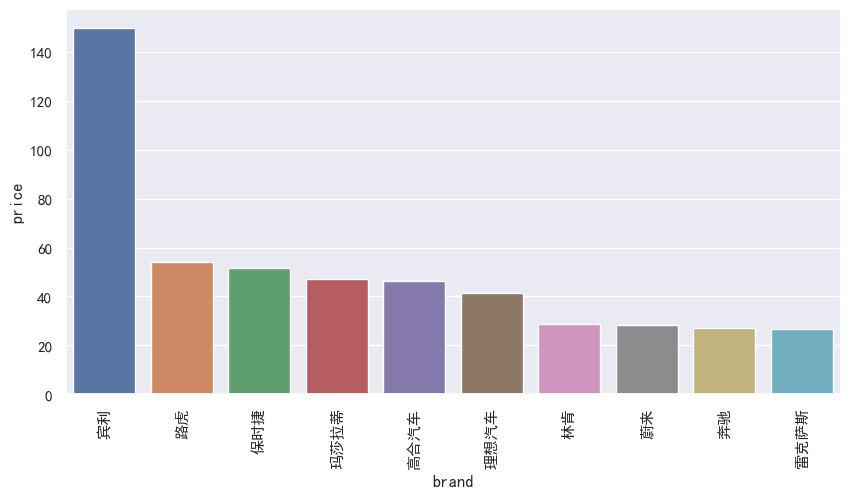

In [100]:
# 设置中文字体
sns.set(font="SimHei")
# 设置图像大小
flg = plt.figure(figsize=(10, 5))
# 绘制条形图
sns.barplot(x=num_top.index, y=num_top)
plt.xticks(rotation=90)
# 显示图像
flg.show()

销量

In [102]:
# 获取数量最多的前十个品牌
amount_top = df["brand"].value_counts(sort=True)[:10]

C:\Users\29600\AppData\Local\Temp\ipykernel_46260\968471167.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  flg_amount.show()


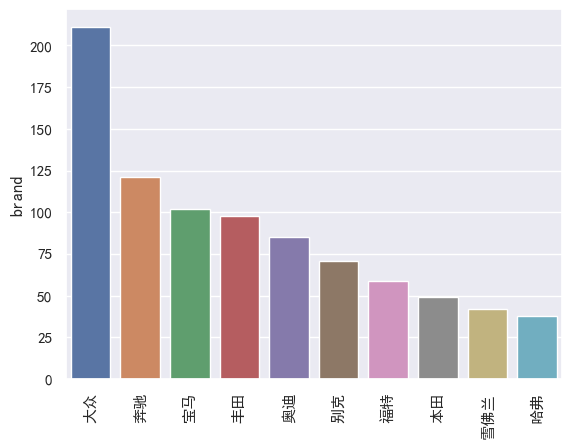

In [103]:
flg_amount = plt.figure()
sns.barplot(x=amount_top.index, y=amount_top)
plt.xticks(rotation=90)
flg_amount.show()

销量占比分析（饼图）

C:\Users\29600\AppData\Local\Temp\ipykernel_46260\3380817947.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  flg_pie.show()


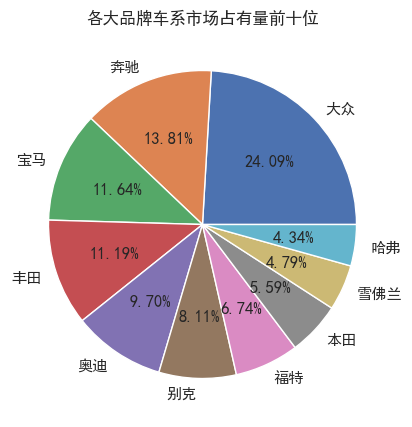

In [109]:
flg_pie = plt.figure(figsize=(5,5))
# 绘制饼图
plt.pie(amount_top, labels=amount_top.index, autopct="%1.2f%%")
plt.title("各大品牌车系市场占有量前十位")
flg_pie.show()

价格分区概率分析（大众）

In [108]:
df_DZ = df[df["brand"] == "大众"]
df_DZ.head()

,brand,price,准新车,超值,里程少,0过户,急售
0,大众,5.30,0,0,0,1,0
14,大众,10.18,0,0,0,1,0
16,大众,10.80,0,0,1,1,0
17,大众,5.00,0,0,0,1,0
24,大众,6.80,0,0,0,1,0


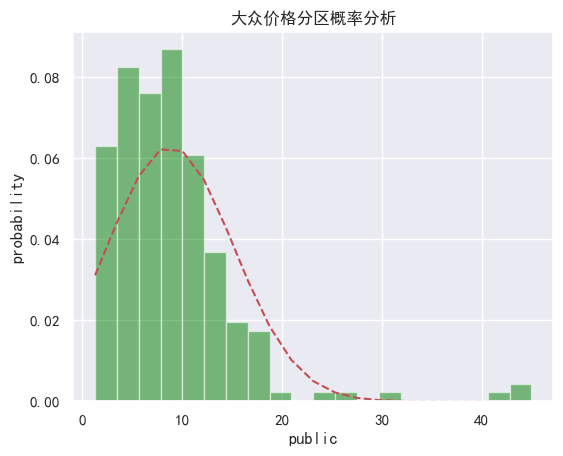

In [117]:
# 绘制条形图和概率密度曲线
# 价格均值
BM_mean = df_DZ["price"].mean()
# 价格标准差
BM_std = df_DZ["price"].std()
# 条状图数量
num_bins = 20
# density：归一化, alpha：不透明度
n, bins, patches = plt.hist(df_DZ["price"], num_bins, facecolor="green", density=True, alpha=0.5)

from scipy.stats import norm

# 在正态分布上计算概率密度
y = norm.pdf(bins, BM_mean, BM_std)
# 绘制概率密度函数图
plt.plot(bins, y,"r--")
plt.xlabel("public")
plt.ylabel("probability")
plt.title("大众价格分区概率分析")
plt.subplots_adjust(left=0.15)
plt.show()

特征工程（品牌 ONE-HOT 编码）

In [121]:
# 对于品牌进行 one_hot 编码（“独热”编码）
one_hot_df = pd.get_dummies(df["brand"])
# 删除品牌字段
df = df.drop("brand", axis=1)
# 合并两个表，关联字段为行索引
df = pd.merge(df, one_hot_df, left_index=True, right_index=True)


KeyError: 'brand'

建模

In [124]:
# 数据准备
# 样本特征 (除价格外的所有数据)
X = df[df.columns.difference(["price"])].values
# 样本标签 (价格)
Y = df["price"]

In [131]:
# 用于拆分数据集
from sklearn.model_selection import train_test_split
# 梯度提升回归算法类
from sklearn.ensemble import GradientBoostingRegressor
# 评估函数
from  sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 拆分数据集
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=666)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=666)
# 模型
gbdt = GradientBoostingRegressor(n_estimators=70)
# 训练模型
gbdt.fit(X_train, Y_train)
# 预测
pred = gbdt.predict(X_test)


In [132]:
# 评估
print("MSE", mean_squared_error(Y_test, pred))
print("MAE", mean_absolute_error(Y_test, pred))
print("RMSE", np.sqrt(mean_squared_error(Y_test, pred)))
print("R2", r2_score(Y_test, pred))

MSE 179.26912578064005
MAE 7.279052677778964
RMSE 13.389142085310771
R2 0.3130060323555254
